<a href="https://colab.research.google.com/github/N1r4jpundir/Practicals/blob/main/17_Data_and_Sampling_Distributions%20FDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import binom
import seaborn as sns
import pylab

import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
loans_income = pd.read_csv('/content/sample_data/loans_income.csv')
sp500_px = pd.read_csv('/content/sample_data/sp500_px.csv')

FileNotFoundError: ignored

In [7]:
loans_income.shape

(50000, 1)

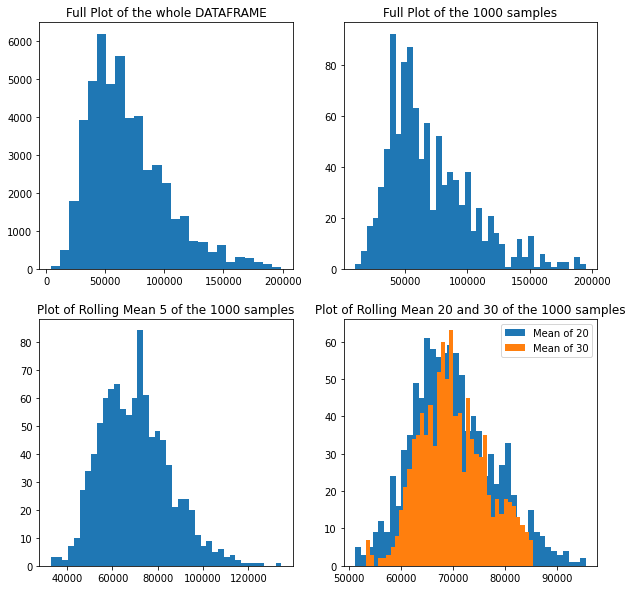

In [6]:

#Calculating a rolling mean:

#Take a 1000 Samples
samples = loans_income.sample(n=1000)

#mean of 5 numbers
sample_mean_5 = samples.rolling(5).mean().x
sample_mean_5 = sample_mean_5.dropna()

#mean of 20 numbers
sample_mean_20 = samples.rolling(20).mean().x
sample_mean_20 = sample_mean_20.dropna()

# mean of 30 numbers
sample_mean_30 = samples.rolling(30).mean().x
sample_mean_30 = sample_mean_30.dropna()

fig = plt.figure(figsize=(10,10))
#The full distribution of the plot:
ax = fig.add_subplot(2,2,1)
ax.hist(loans_income.x,bins=25)
plt.title('Full Plot of the whole DATAFRAME')

#distribution of 1000 samples:

ax = fig.add_subplot(2,2,2)
ax.hist(samples.x,bins=40)
plt.title('Full Plot of the 1000 samples')

#distribution of means of 5 numbers from 1000 samples:
ax = fig.add_subplot(2,2,3)
ax.hist(sample_mean_5,bins=40)
plt.title('Plot of Rolling Mean 5 of the 1000 samples')

#distribution of means of 20 numbers from 1000 samples:
ax = fig.add_subplot(2,2,4)
ax.hist(sample_mean_20,bins=40,label='Mean of 20')
ax.hist(sample_mean_30,bins=40,label='Mean of 30')
plt.title('Plot of Rolling Mean 20 and 30 of the 1000 samples')
ax.legend()
plt.show()

plt.show()

**#Calculating a rolling mean:**

In [ ]:
print('Total Population STD : ',loans_income.x.std())
print('Total Population Mean : ',loans_income.x.mean())
print('Total Population Median : ',np.median(loans_income.x))
print('Total Population Standard Error:',stats.sem(loans_income.x, ddof=1))

Total Population STD :  32872.03536985002
Total Population Mean :  68760.51844
Total Population Median :  62000.0
Total Population Standard Error: 147.00821129152527


**Bootstrapping for 1000,10000,20000 Samples**

In [ ]:
bootstrap_1000 = np.random.choice(loans_income.x,size=1000,replace=True)
bootstrap_10000 = np.random.choice(loans_income.x,size=10000,replace=True)
bootstrap_20000 = np.random.choice(loans_income.x,size=20000,replace=True)
arr_bootstraps = [bootstrap_1000,bootstrap_10000,bootstrap_20000]
len(arr_bootstraps)

3

In [ ]:
#Calculating a rolling mean:
for i in range(len(arr_bootstraps)):
    print('Bootstrap Stats for {} examples \n'.format(len(arr_bootstraps[i])))
    print('------------------------------------------------------------------------------\n')
    print('Bootstrap STD : ',np.std(arr_bootstraps[i],ddof=1))
    print('Bootstrap Mean : ',np.mean(arr_bootstraps[i]))
    print('Bootstrap Median: ',np.median(arr_bootstraps[i]))
    print('Boostrap Bias, ',loans_income.x.mean() - np.mean(arr_bootstraps[i],axis=0))
    print('Standard Error:',stats.sem(arr_bootstraps[i], ddof=1))
    print('\n------------------------------------------------------------------------------\n')

Bootstrap Stats for 1000 examples 

------------------------------------------------------------------------------

Bootstrap STD :  32076.61606417047
Bootstrap Mean :  67877.327
Bootstrap Median:  61250.0
Boostrap Bias,  883.191439999995
Standard Error: 1014.3516639352445

------------------------------------------------------------------------------

Bootstrap Stats for 10000 examples 

------------------------------------------------------------------------------

Bootstrap STD :  32466.076783264038
Bootstrap Mean :  68329.8481
Bootstrap Median:  61000.0
Boostrap Bias,  430.67033999999694
Standard Error: 324.6607678326404

------------------------------------------------------------------------------

Bootstrap Stats for 20000 examples 

------------------------------------------------------------------------------

Bootstrap STD :  32783.21197681355
Bootstrap Mean :  68494.7653
Bootstrap Median:  62000.0
Boostrap Bias,  265.7531400000007
Standard Error: 231.81231497880904

--------

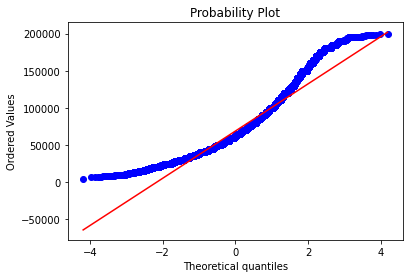

In [ ]:
stats.probplot(loans_income.x, dist="norm", plot=pylab)
pylab.show()

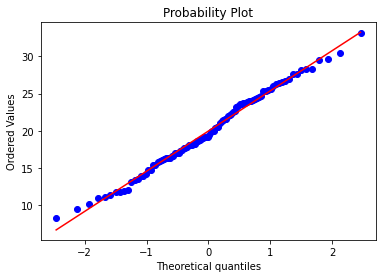

In [ ]:
measurements = np.random.normal(loc = 20, scale = 5, size=100)   
stats.probplot(measurements, dist="norm", plot=pylab)
pylab.show()

In [ ]:
nflx = sp500_px.loc[:,'NFLX']

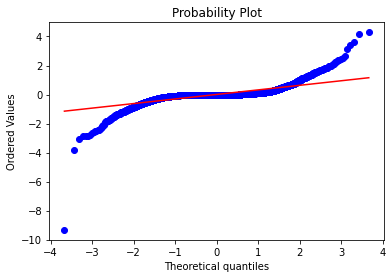

In [ ]:
stats.probplot(nflx, dist="norm", plot=pylab)
pylab.show()

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:1280: RuntimeWarning: invalid value encountered in subtract
  a = op(a[slice1], a[slice2])


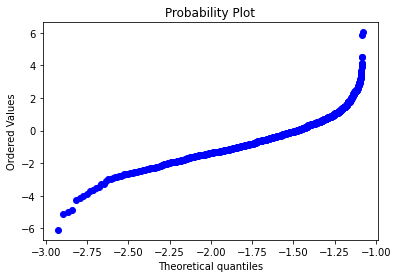

In [ ]:
# After standardizing tread

treated_nflx = np.diff(np.log(nflx))
stats.probplot(treated_nflx, dist="norm", plot=pylab,fit=True)
pylab.show()

In [ ]:
>>> n, p = 10, .5  # number of trials, probability of each trial
>>> s = np.random.binomial(n, p, 1000)
# result of flipping a coin 10 times, tested 1000 times.

#What is probablity of getting zero success in the 1000 test

print(sum(s==0)/1000)

0.001
